<a href="https://colab.research.google.com/github/StanStarishko/python-programming-for-data/blob/main/Worksheets/7_1_Visualisation_with_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing data visually
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use **matplotlib**, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 1 to 7 is in this [image](https://drive.google.com/file/d/1yuuDSBI2gES2ipRWTa8XAycNqVd2Eqov/view?usp=sharing)

# IMPORTANT
---
There has been an upgrade to a library needed for reading Excel files in a notebook.  To ensure that you have this upgrade, run the code in the cell below and then select 'Restart runtime' from the Runtime menu.

In [ ]:
!pip install --upgrade openpyxl

#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

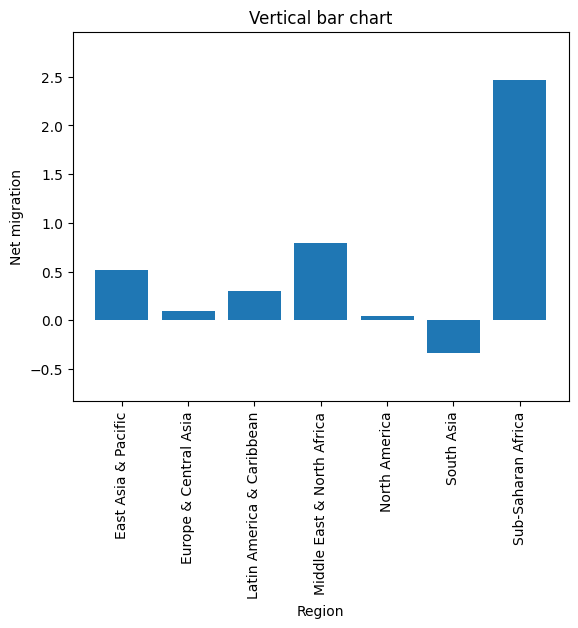

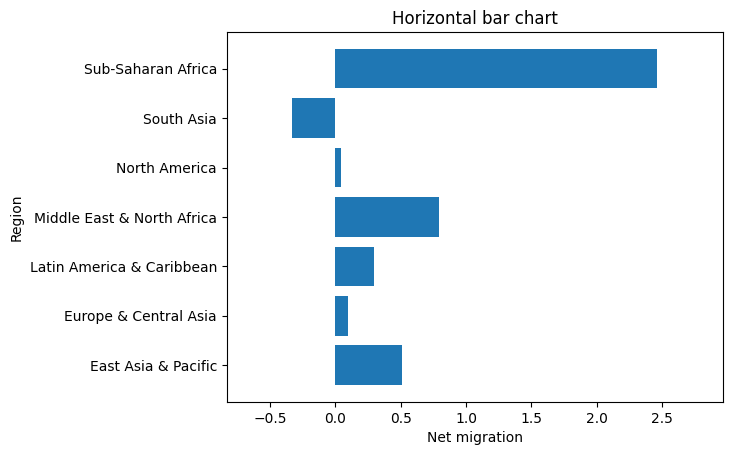

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def is_valid_link(link="",link_name="",autotest=False):
  # link always isn't empty and must have is string
  return_value = link != "" and isinstance(link, str)

  if not return_value and not autotest: # not print if autotest
    print(f"{link_name} is not valid")

  return return_value


def get_excel_data(url="",sheet_name="default"):
  # url and sheet name always isn't empty and must have is string

  is_not_valid_url = not is_valid_link(url,"url")
  is_not_valid_sheet_name = not is_valid_link(sheet_name,"sheet name")

  if is_not_valid_url or is_not_valid_sheet_name:
    return False

  if sheet_name == "default":
    df = pd.read_excel(url)
  else:
    df = pd.read_excel(url,sheet_name)

  return df


# porcedure for creating a bar chart
def create_bar_chart(url="",sheet_name=""):
  df = get_excel_data(url,sheet_name)
  numerical_df = df.select_dtypes(include="number")
  regions = df.groupby("base_country_wb_region")[numerical_df.columns].mean()
  data = regions["net_per_10K_2015"]
  labels = data.keys()

  min_data = data.min()-0.5
  max_data = data.max()+0.5

  plt.bar(labels, data)
  plt.title("Vertical bar chart")
  plt.xlabel('Region')
  plt.xticks(rotation=90)
  plt.ylabel('Net migration')
  plt.ylim(min_data,max_data)
  plt.show()
  print()

  plt.barh(labels, data)
  plt.title("Horizontal bar chart")
  plt.xlabel('Net migration')
  plt.xlim(min_data,max_data)
  plt.ylabel('Region')
  plt.show()

  return df


# creating a bar chart
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
sheet_name = "Country Migration"
result_df = create_bar_chart(url,sheet_name)



### Exercise 1 - Line plot of net migration
---

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings)
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

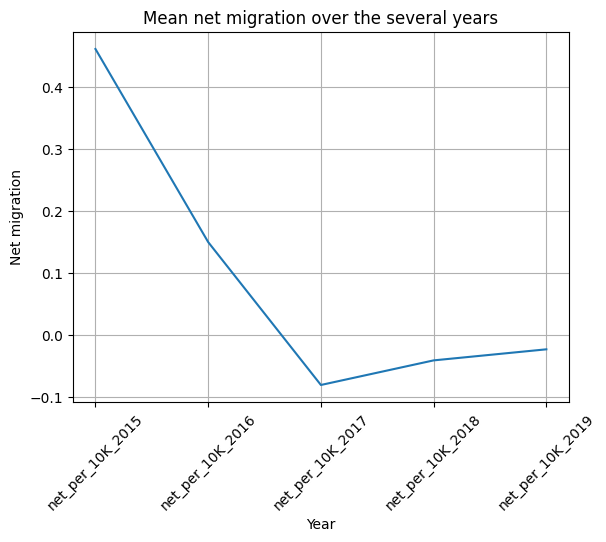

In [ ]:
# Line plot of mean net migration over the clear migracion
# create a new dataframe containing only the five columns holding net migration
# create a new data variable to hold the means of the five columns
# create a labels variable to hold the keys (column headings)
# use plt.plot(x, y) to plot your line chart
# Plot the chart, then add formatting, then show the plot
# Rotate the x-axis labels in the plot: plt.xticks(rotation=45)
# Show the grid: plt.grid()
# When all formatting has been done, show the plot: plt.show()

def create_line_plot(url="",sheet_name=""):
  #get a dataframe
  df = get_excel_data(url,sheet_name)

  # create a new dataframe containing only the five columns holding net migration
  filtered_columns = df.filter(like='net_per_10K')
  numerical_df = filtered_columns.select_dtypes(include="number")

  # create a new data variable to hold the means of the five columns
  data = numerical_df.mean()

  # create a labels variable to hold the keys (column headings)
  labels = data.keys()
  # use plt.plot(x, y) to plot your line chart
  plt.plot(labels, data)
  # Plot the chart, then add formatting, then show the plot
  plt.title("Mean net migration over the several years")
  plt.xlabel('Year')
  plt.xticks(rotation=45)
  plt.ylabel('Net migration')
  plt.grid()
  plt.show()
  return df

# execute procedure from main context
new_df = create_line_plot(url,sheet_name)


### Exercise 2 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  

* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis
* display your bar graph with plt.show()

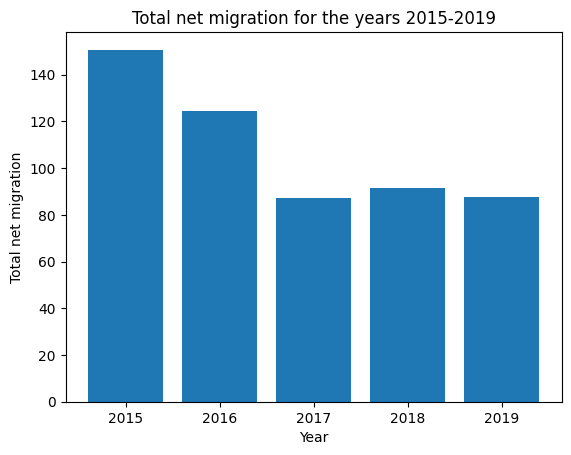

In [ ]:
# Line plot of mean net migration over the several years
# Create a bar chart which shows the total net migration for the years 2015-2019

# split the migration columns into a new dataframe
# create a data variable from the max() of the five columns
# create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
# plot the bar chart
# Presentation tips:

# use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis
# display your bar graph with plt.show()

def create_bar_chart_for_several_years(url="",sheet_name=""):
  #get a dataframe
  df = get_excel_data(url,sheet_name)

  # define labels and years filter
  labels = ["2015","2016","2017","2018","2019"]

  # create a new dataframe containing only the five columns holding years migration from filter
  filtered_columns = filtered_columns = df[[col for col in df.columns if any(label in col for label in labels)]]
  numerical_df = filtered_columns.select_dtypes(include="number")

  # create a data variable from the max() of the five columns
  data = numerical_df.max()

  # plot the bar chart
  plt.bar(labels, data)
  plt.title("Total net migration for the years 2015-2019")
  plt.xlabel('Year')
  plt.ylabel('Total net migration')
  plt.show()
  return df


# execute procedure from main context
new_df = create_bar_chart_for_several_years(url,sheet_name)



### Exercise 3 - creating a bar graph using grouped data
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`'
* extract your labels (x) using the .keys() function
* use the plt.barh(x, y) to create a horizontal bar graph
* add labels to the axes (eg. 'Net Migration','Income level')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

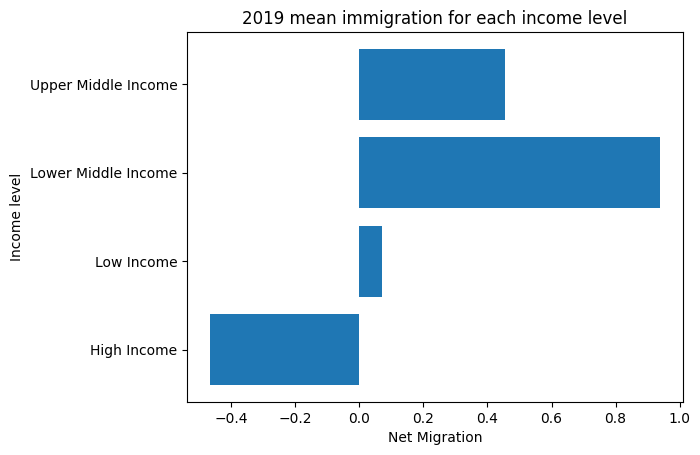

In [ ]:
# Create a horizontal bar chart of 2019 mean immigration for each income level ('target_country_wb_income')
# create a data variable which contains the means, grouped by 'target_country_wb_income'
# extract your labels (x) using the .keys() function
# use the plt.barh(x, y) to create a horizontal bar graph
# add labels to the axes (eg. 'Net Migration','Income level')
# show the plot
# Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

def income_level_bar_chart(url="",sheet_name=""):
  #get a dataframe
  df = get_excel_data(url,sheet_name)

  # create a new dataframe containing only the five columns holding years migration from filter
  filtered_columns = df.filter(like='net_per_10K_2019')
  numerical_df = filtered_columns.select_dtypes(include="number")

  # create a data variable which contains the means, grouped by 'target_country_wb_income'
  data = df.groupby("target_country_wb_income")[numerical_df.columns].mean()["net_per_10K_2019"]

  # extract your labels (x) using the .keys() function
  labels = data.keys()

  # use the plt.barh(x, y) to create a horizontal bar graph
  plt.barh(labels, data)
  plt.title("2019 mean immigration for each income level")
  plt.xlabel('Net Migration')
  plt.ylabel('Income level')
  plt.show()
  return df

# execute procedure from main context
new_df = income_level_bar_chart(url,sheet_name)




# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

### Exercise 4 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 2 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




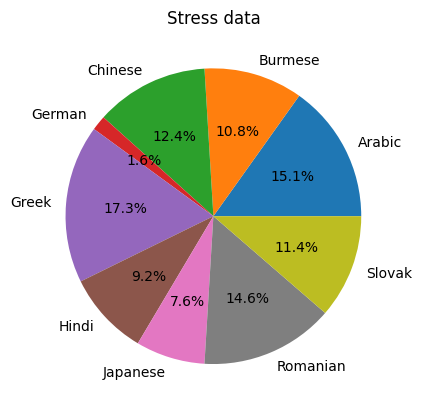

In [ ]:
# get data from CVS
def get_csv_data(url):

  if not is_valid_link(url,"url"):
    return False

  df = pd.read_csv(url)
  return df


# Creating a pie chart of stress data
def create_pie_chart(url=""):
  #read csv file above and save into a new variable called psych_data
  df = get_csv_data(url)

  #similar to Exercise 2 - create a variable which groups the means of data by first
  #store the means for 'Stress' in a variable called data
  #extract your labels using the keys() function
  #plot your pie chart using plt.pie(data, labels = labels)
  #write a comment noting anything interesting about the visualisation

  # create a new dataframe containing only the five columns holding years migration from filter
  filtered_columns = df.filter(like='Stress')
  numerical_df = filtered_columns.select_dtypes(include="number")

  # store the means for 'Stress' in a variable called data
  data = df.groupby("firstlanguage")[numerical_df.columns].mean()["Stress"]

  # extract your labels using the keys() function
  labels = data.keys()
  # plot your pie chart using plt.pie(data, labels = labels)
  plt.pie(data, labels = labels, autopct='%1.1f%%')
  plt.title("Stress data")
  plt.show()

  return df


# execute procedure from main context
url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv"
new_df = create_pie_chart(url)

### Exercise 5 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median.

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels=["Wellbeing"]) to create the boxplot
*  show the boxplot

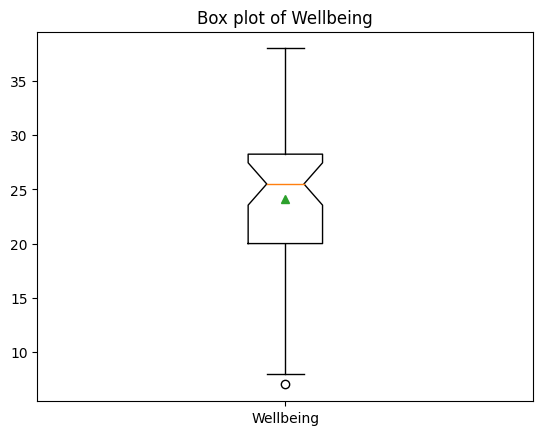

In [ ]:
# Creating a box plot of Wellbeing
def create_box_plot(url=""):
  #read csv file above and save into a new variable called psych_data
  df = get_csv_data(url)

  # A box plot is used to visualise summary infomation about a data series such as the min, max and median
  # create a new dataframe containing only the five columns holding years migration from filter
  filtered_columns = df.filter(like='Wellbeing')
  numerical_df = filtered_columns.select_dtypes(include="number")

  # split off the wellbeing column
  data = numerical_df#["Wellbeing"]


  #use plt.boxplot(data, labels=["Wellbeing"]) to create the boxplot
  plt.boxplot(data,
              labels=['Wellbeing'],
              #vert=False,
              #patch_artist=True,
              notch=True,
              showmeans=True
              )
  plt.title("Box plot of Wellbeing")

  #show the boxplot
  plt.show()

  return df


# execute procedure from main context
new_df = create_box_plot(url)


### Exercise 6 - Histograms of  age
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)`
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


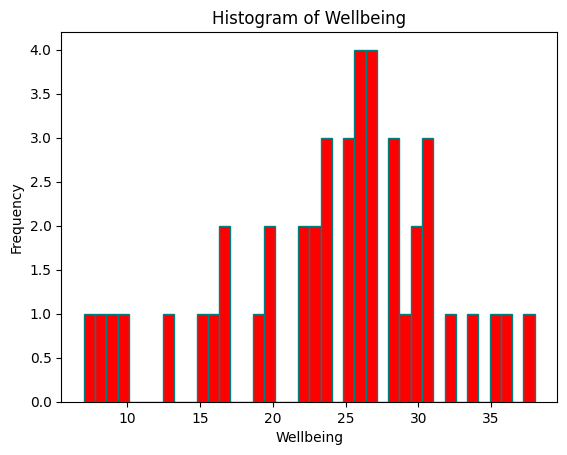

In [ ]:
# Create a histogram
def create_histogram(url=""):
  #read csv file above and save into a new variable called psych_data
  df = get_csv_data(url)

  # Create a histogram
  # split the Well
  filtered_columns = df.filter(like='Wellbeing')
  numerical_df = filtered_columns.select_dtypes(include="number")
  data = numerical_df["Wellbeing"]

  # plot the histogram using plt.hist(data)
  data_max = data.max()
  set_bins = ((data_max // 10) + 1) * 10 # for more detals than defoult
  plt.hist(data, color = 'red', edgecolor = 'teal', bins = set_bins)
  plt.title("Histogram of Wellbeing")
  plt.xlabel('Wellbeing')
  plt.ylabel('Frequency')
  plt.show()

  return df


# execute procedure from main context
new_df = create_histogram(url)



### Exercise 7 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Assuming that Stress is fairly closely associated with Wellbeing:

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   
* the code cell below already has the linregress function imported from the scipy.stats library
* create a regression variable and assign the result of using linregress (`regression = linregress(x,y)` )
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plot a line using `plt.plot(x, slope*x + intercept)`

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




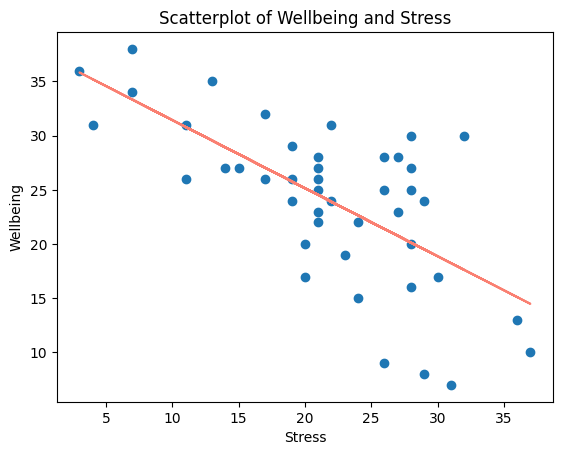

In [ ]:
from scipy.stats import linregress

# Create a scatterplot with line of best fit
def create_scatterplot(url=""):
  #read csv file above and save into a new variable called psych_data
  df = get_csv_data(url)

  # Assuming that Stress is fairly closely associated with Wellbeing:
  # Create a scatterplot of Wellbeing and Stress data.

  # create x from the Stress column
  filtered_columns = df.filter(like='Stress')
  numerical_df = filtered_columns.select_dtypes(include="number")
  data_x = numerical_df["Stress"]

  # create y from the Wellbeing column
  filtered_columns = df.filter(like='Wellbeing')
  numerical_df = filtered_columns.select_dtypes(include="number")
  data_y = numerical_df["Wellbeing"]

  # use plt.scatter(x,y) to create a scatterplot
  plt.scatter(data_x, data_y)
  plt.title("Scatterplot of Wellbeing and Stress")

  # add x axis and y axis labels using plt.xlabel('Stress') and plt.ylabel('Wellbeing')
  plt.xlabel('Stress')
  plt.ylabel('Wellbeing')

  # Adding a line of best fit:
  # the code cell below already has the linregress function imported from the scipy.stats library
  # create a regression variable
  regression = linregress(data_x,data_y)

  # assign the result of using linregress (regression = linregress(x,y) )
  # store the slope and intercept (slope = regression.slope, intercept = regression.intercept)
  slope = regression.slope
  intercept = regression.intercept

  # plot a line using plt.plot(x, slope*x + intercept)
  plt.plot(data_x, slope*data_x + intercept, color='salmon')
  plt.show()

  return df


# execute procedure from main context
new_df = create_scatterplot(url)



### Exercise 8 - Create a set of charts from a data set
---
Use the student exam scores dataset here: https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv

Investigate the data and create a set of charts.  

Create each chart in a new code cell.

Add a text cell below each visualisation to explain what the chart is showing.


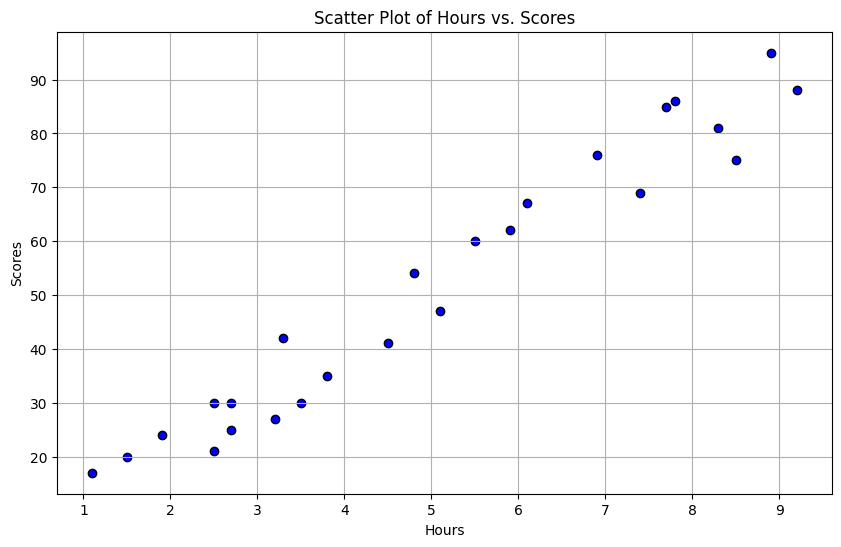


  The relationship between the number of hours spent on training 
  and the final scores. Each point on the graph represents one observation. 
  The graph shows how the results (Scores) depend on the time (Hours) spent on training. 
  There is a positive trend: as the number of hours 
  spent on training increases, so do the results
  


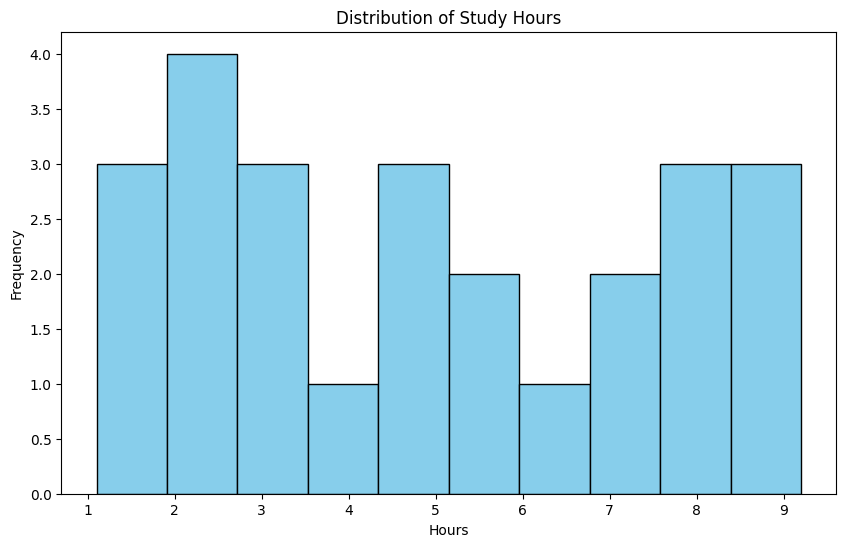


  The histogram shows the distribution of the number of hours 
  students spent studying. This helps us understand 
  how the data is distributed.
  


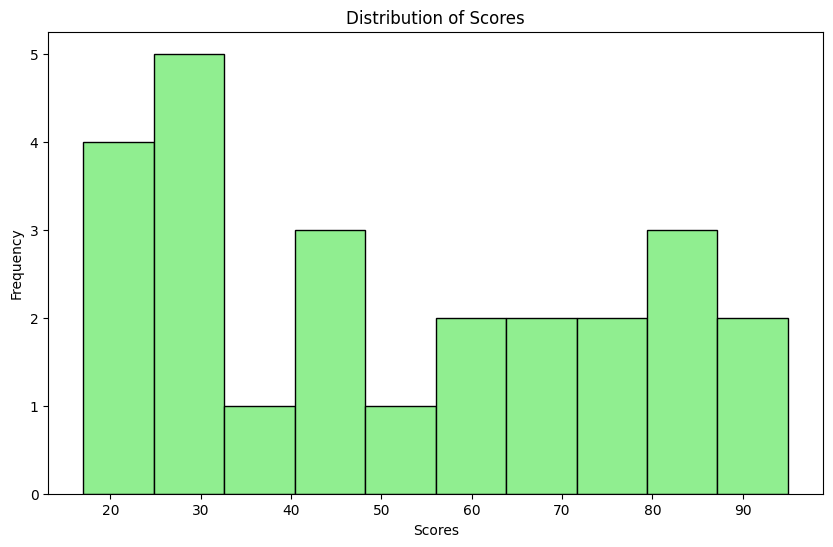


  Shows how the scores obtained by students are distributed. 
  Helps to see if there is a tendency towards certain results, 
  for example, most students scored between 60 and 80 points  
  


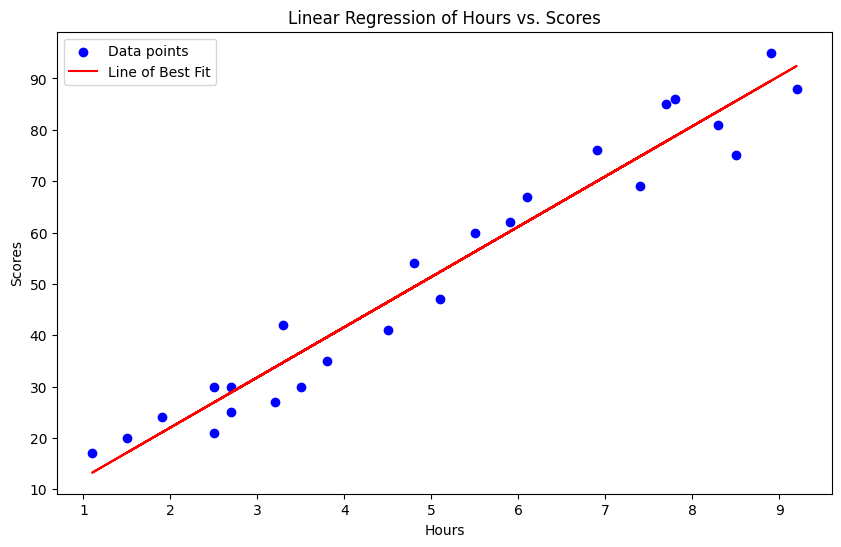


  This graph shows a line of best fit based on linear regression. 
  The line shows a trend: as the amount of time spent studying increases, 
  students' grades tend to increase. Linear regression helps quantify 
  this relationship.
  


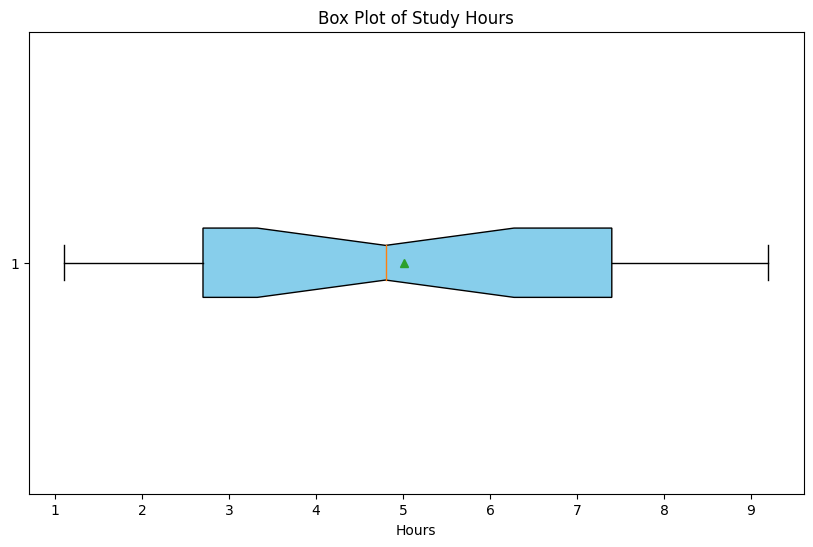


  Shows the distribution of the number of hours spent on training. 
  You can see the median (the center line in the box), 
  the interquartile range (the size of the box), 
  and possible outliers (points outside the whiskers)
  


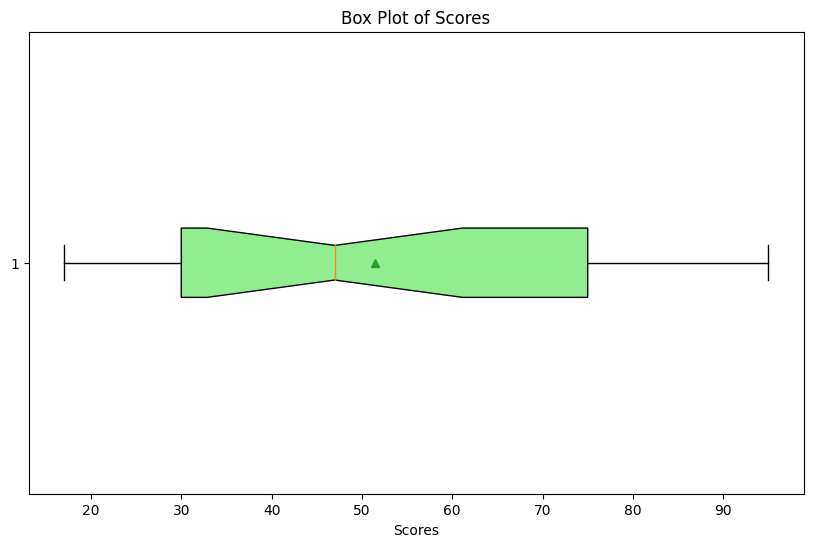


  Shows the distribution of grades obtained by students. 
  It allows you to see the central tendency and variability of the data, 
  as well as identify possible outliers
  

  

  

  


In [ ]:
# Create a set of charts from a data set
def create_charts(url=""):
  #read csv file above and save into a new variable called psych_data
  df = get_csv_data(url)


  # Scatter plot
  plt.figure(figsize=(10, 6))
  plt.scatter(df['Hours'], df['Scores'], color='blue', edgecolor='black')
  plt.title('Scatter Plot of Hours vs. Scores')
  plt.xlabel('Hours')
  plt.ylabel('Scores')
  plt.grid(True)
  plt.show()
  print('''
  The relationship between the number of hours spent on training
  and the final scores. Each point on the graph represents one observation.
  The graph shows how the results (Scores) depend on the time (Hours) spent on training.
  There is a positive trend: as the number of hours
  spent on training increases, so do the results
  ''')


  # Histogram of distribution of hours of study
  plt.figure(figsize=(10, 6))
  plt.hist(df['Hours'], bins=10, color='skyblue', edgecolor='black')
  plt.title('Distribution of Study Hours')
  plt.xlabel('Hours')
  plt.ylabel('Frequency')
  plt.show()
  print('''
  The histogram shows the distribution of the number of hours
  students spent studying. This helps us understand
  how the data is distributed.
  ''')

  # Histogram for estimates
  plt.figure(figsize=(10, 6))
  plt.hist(df['Scores'], bins=10, color='lightgreen', edgecolor='black')
  plt.title('Distribution of Scores')
  plt.xlabel('Scores')
  plt.ylabel('Frequency')
  plt.show()
  print('''
  Shows how the scores obtained by students are distributed.
  Helps to see if there is a tendency towards certain results,
  for example, most students scored between 60 and 80 points
  ''')


  # Executing linear regression
  regression = linregress(df['Hours'], df['Scores'])

  # Creating the line of best fit
  plt.figure(figsize=(10, 6))
  plt.scatter(df['Hours'], df['Scores'], color='blue', label='Data points')
  plt.plot(df['Hours'], regression.slope * df['Hours'] + regression.intercept, color='red', label='Line of Best Fit')
  plt.title('Linear Regression of Hours vs. Scores')
  plt.xlabel('Hours')
  plt.ylabel('Scores')
  plt.legend()
  plt.show()
  print('''
  This graph shows a line of best fit based on linear regression.
  The line shows a trend: as the amount of time spent studying increases,
  students' grades tend to increase. Linear regression helps quantify
  this relationship.
  ''')


  # Creating a box plot for training hours
  plt.figure(figsize=(10, 6))
  plt.boxplot(df['Hours'],
              vert=False,
              patch_artist=True,
              boxprops=dict(facecolor='skyblue'),
              notch=True,
              showmeans=True
              )

  plt.title('Box Plot of Study Hours')
  plt.xlabel('Hours')
  plt.show()
  print('''
  Shows the distribution of the number of hours spent on training.
  You can see the median (the center line in the box),
  the interquartile range (the size of the box),
  and possible outliers (points outside the whiskers)
  ''')


  # Box plot for estimates
  plt.figure(figsize=(10, 6))
  plt.boxplot(df['Scores'],
              vert=False,
              patch_artist=True,
              boxprops=dict(facecolor='lightgreen'),
              notch=True,
              showmeans=True
              )
  plt.title('Box Plot of Scores')
  plt.xlabel('Scores')
  plt.show()
  print('''
  Shows the distribution of grades obtained by students.
  It allows you to see the central tendency and variability of the data,
  as well as identify possible outliers
  ''')

  return df


# execute procedure from main context
url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv"
new_df = create_charts(url)



# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)